# Applied Statistics - **Assessment Problems**

This notebook contains my work undertaken in completing the tasks for the Applied Statistics module.
***

## Problem 1:  Extending the Lady Tasting Tea

![tea](img/vecteezy_ai-generated-tea-cup-cake-and-a-pink-peony_37286987.jpg)

### What is the Lady Tasting Tea experiment about?

The **Lady Tasting Tea** is the famous experiment which demonstrate the foundations of modern statistics, particularly the principles of hypothesis testing, randomisation and controlled 
trials conducted by Ronald Fisher in the early 20th century. The experiment began when an English Lady, Muriel Bristol, claimed that she could tell whether milk had been poured into a cup 
before or after the tea. 

To test her claim, Fisher promptly turned it into an experiment using eight coups of tea, four prepared with milk first and four the other way round, tea first. Muriel was asked to 
identify which cups belong to each group. She had to guess the order based solely on her taste perception and she successfully identified all cups. 

The idea of hypothesis testing introduced by Fisher in this experiment is to determinate if Muriel can genuinely tell the difference between the two types of teas, or if her guesses are 
due to chance. The null hypothesis is that she has no ability to tell the difference and is simply guessing. If the probability of her guesses is very low, the experiment rejects the null 
hypothesis, concluding she can taste the difference. If the probability is high, it suggests her performance could easily be due to chance alone.

### Extending the Lady Tasting Tea experiment

>Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A 
participant claims they can tell which was poured first. Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant 
correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.<br>
>In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or 
relaxing the p-value threshold compared to the original design.

Firstly, I need to import various libraries required to complete this experiment.

In [2]:
# Math function from Python library. 
import math

# Interator function from Python library. 
import itertools

# Random selections. 
import random

# Numerical operation 
import numpy as np

# Data visualization and plotting 
import matplotlib.pyplot as plt 

In the next step I will set out the total cups of tea, the number of cups where the milk is first and number of cups where tea is first.

In [3]:
# Total number of cups 
no_cups = 12

# Tea first cups 
no_tea_first = 8

# Milk first cups 
no_milk_first = 4 

The `math.comb()` function calculates the number of ways to choose `k` items from a set of `n` (total number items in a set) items, without 
repetition and without considering order. It returns number of combination (also known as the binomial coefficient), which is computed using the formula:  `*n! / (k! * (n-k)!)*`. <br>

https://docs.python.org/3/library/math.html#math.comb

In [4]:
# Number of ways of selecting 8 cups with the tea first from the total of 12 cups 
no_ways = math.comb(no_cups, no_tea_first) 
print(f'Number of ways to select cups is: {no_ways}')

Number of ways to select cups is: 495


In [5]:
# Number of ways of selecting 4 cups with the milk first from the total of 12 cups 
no_ways = math.comb(no_cups, no_milk_first) 
print(f'Number of ways to select cups is: {no_ways}')

Number of ways to select cups is: 495


As we can see from above, there is **495** possible combinations in either way.

In [6]:
# The probability of randomly selecting correct cups. 
exact_prob = 1 / no_ways 
print(f'Exact probability of selecting correct cups is: {exact_prob}')

Exact probability of selecting correct cups is: 0.00202020202020202


Ordering of the results

In [7]:
# Labeling the cups
labels = list(range(no_cups)) 
print(f'Printing a set of labels: {labels}')

Printing a set of labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Showing the different way how to select the cups with the tea first from the total amount of the cups.
# https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
combinations = list(itertools.combinations(labels, no_tea_first)) 

# Selecting the 8 cups randomly
# https://docs.python.org/3/library/random.html#random.sample
labels_tea = random.sample(labels, 8)
labels_tea.sort()
print(f'This is a random sample of the labes where the 8 cups were selected as tea first: {labels_tea}')

This is a random sample of the labes where the 8 cups were selected as tea first: [1, 2, 3, 4, 5, 6, 9, 10]


In [9]:
# Turning the list result into a set.
# https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_tea)

{1, 2, 3, 4, 5, 6, 9, 10}

In [10]:
# Calculating the overlap between each element and lables_tea set.
no_overlaps = []

# Loop through the combinations.
for combinations in combinations:
  # Turn combinations into a set.
  s1 = set(combinations)
  # Turn labels_tea into a set.
  s2 = set(labels_tea)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(combinations, len(overlap), overlap)
  # Append overlap into no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5, 6, 7) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 8) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 9) 7 {1, 2, 3, 4, 5, 6, 9}
(0, 1, 2, 3, 4, 5, 6, 10) 7 {1, 2, 3, 4, 5, 6, 10}
(0, 1, 2, 3, 4, 5, 6, 11) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 7, 8) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 7, 9) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 7, 10) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 5, 7, 11) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 8, 9) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 8, 10) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 5, 8, 11) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 9, 10) 7 {1, 2, 3, 4, 5, 9, 10}
(0, 1, 2, 3, 4, 5, 9, 11) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 10, 11) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 6, 7, 8) 5 {1, 2, 3, 4, 6}
(0, 1, 2, 3, 4, 6, 7, 9) 6 {1, 2, 3, 4, 6, 9}
(0, 1, 2, 3, 4, 6, 7, 10) 6 {1, 2, 3, 4, 6, 10}
(0, 1, 2, 3, 4, 6, 7, 11) 5 {1, 2, 3, 4, 6}
(0, 1, 2, 3, 4, 6, 8, 9) 6 {1, 2, 3, 4, 6, 9}
(0, 1, 2, 3, 4, 6, 8, 10) 6 {1, 2, 3, 4, 6, 10}
(0, 1, 2, 3, 4, 6, 8

In [11]:
# Showing the overlaps.
print(no_overlaps)

[6, 6, 7, 7, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 6, 7, 7, 

In [12]:
# Counting how many times the overplap occures and showing the results.
counts = np.unique(no_overlaps, return_counts=True)
#Showing resunts.
counts

(array([4, 5, 6, 7, 8]), array([ 70, 224, 168,  32,   1]))

The `return_counts=True` will tell how many times the random values (4, 5, 6, 7, 8) will appear in the list. <br>As we can see the number 5 will appear in the list 224 times. Which means that 
the random guessing most often leads to 5 correct identifications.

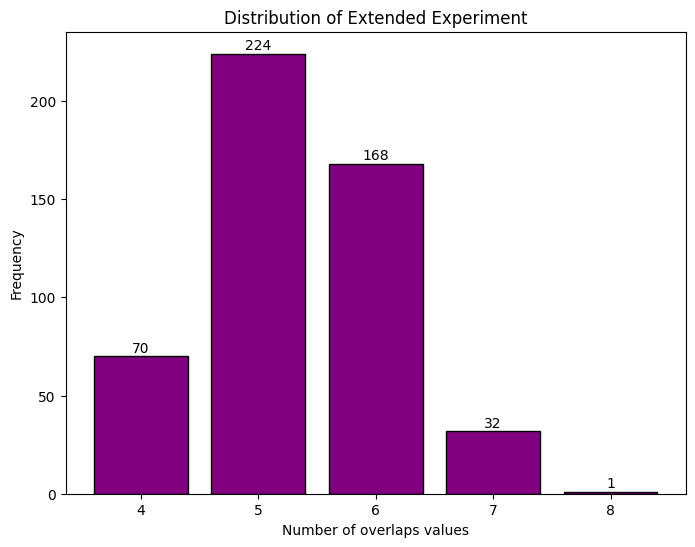

In [13]:
# Plotting the results.

fig, ax = plt.subplots(figsize= (8,6))
ax.bar(counts[0], counts[1], color='purple', edgecolor='black')
for x, y in zip(counts[0], counts[1]):
    ax.text(x, y + 2, str(y), ha='center')

ax.set_title("Distribution of Extended Experiment")
ax.set_xlabel("Number of overlaps values")
ax.set_ylabel("Frequency")

plt.show()

### Numpy simulation

I will define an array of 12 cups which will combined the 8 cups with the tea first and 4 cups with milk first. Then I will simulate the experiment 1,000,000 times to get a reliable estimate of the probability.

In [14]:
# Set the random seed to make sure the results stay same each time the code is run 
np.random.seed(100) 
 
# Number of simulations 
num_simulations = 1000000

# Define an array 
array_cups = np.array(['tea']* no_tea_first + ['milk']* no_milk_first) 
 
# This will count how many times the participant guesses all 12 cups correctly 
correct_guesses = 0 
 
''' For each simulation 
actual: randomly shuffles the 12 cups to simulate the real arrangement 
guess: also shuffles of the same 12 cups '''
for _in in range(num_simulations):
    actual = np.random.permutation(array_cups)
    guess= np.random.permutation(array_cups)
    #check if the guess matches the actual arangement, if so it's coutned as success.
    if np.array_equal(actual, guess):
        correct_guesses += 1

# Calculate the probability
probability = correct_guesses /num_simulations
print (f'Probability of correctly indetifying all cups by chance is: {probability}')

Probability of correctly indetifying all cups by chance is: 0.002045


### Comparison with Fisher (8 cups) experiment

Fisher's original experiment used 8 cups, 4 with tea first and 4 with milk first. The total number of ways to choose 4 cups out of 8 cups is 70 (1/70), and the probability of a perfect guess by chance (all 4 cups correctly) is 0.0143 (1/70) or 1.43%. This low probability provides strong evidence against random guessing if the participant achieves all 4 correctly. <br>

In an extended experiment, I used a total of 12 cups, 8 with tea first and 4 with milk first. The total number of ways to choose 8 cups out of 12 cups is 495, and the probability is 0.002 (1/495) or 0.2%.  This makes a perfect guess even less likely, reinforcing that such an outcome would be extremely unlikely just by chance, and makes it more of a theoretical demonstration. <br>

In [15]:
# Function to simulate the correct milk first cups.
def simulate_counts(no_cups, no_tea_first, num_simulations):
    counts_correct = []
    for _ in range(num_simulations):
        # Randomly choose which cups are milk-first in the true setup
        true_milk = set(random.sample(range(no_cups), no_cups - no_tea_first))
        
        # Randomly choose which cups the participant guesses as milk-first
        guess_milk = set(random.sample(range(no_cups), no_cups - no_tea_first))
        
        # Count how many guesses are correct
        num_correct = len(true_milk.intersection(guess_milk))
        counts_correct.append(num_correct)
    return counts_correct

In [16]:
# Fisher's Original Experiment (8 cups: 4 tea-first, 4 milk-first)
counts_8 = simulate_counts(8, 4, num_simulations)
prob_8 = counts_8.count(4) / num_simulations
print(f"Fisher's Experiment (8 cups): Probability of perfect guess = {prob_8:.6%}")

Fisher's Experiment (8 cups): Probability of perfect guess = 1.435700%


In [17]:
# Extended Experiment (12 cups: 8 tea-first, 4 milk-first)
counts_12 = simulate_counts(12, 8, num_simulations)
prob_12 = counts_12.count(4) / num_simulations
print(f"Extended Experiment (12 cups): Probability of perfect guess = {prob_12:.6%}")

Extended Experiment (12 cups): Probability of perfect guess = 0.193900%


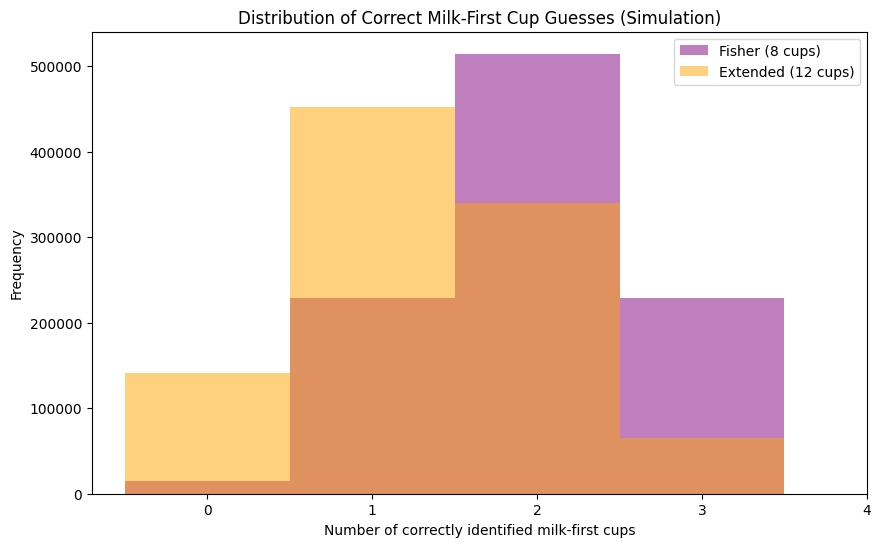

In [18]:
# Plot the milk first cups correctly identified.
bins_8 = np.arange(0, 5) - 0.5   # Fisher (0-4 correct)
bins_12 = np.arange(0, 5) - 0.5  # Extended (0-4 correct, max milk-first is 4)

plt.figure(figsize=(10,6))
plt.hist(counts_8, bins=bins_8, alpha=0.5, color='purple', label="Fisher (8 cups)")
plt.hist(counts_12, bins=bins_12, alpha=0.5, color='orange', label="Extended (12 cups)")

plt.xticks(range(5))
plt.xlabel("Number of correctly identified milk-first cups")
plt.ylabel("Frequency")
plt.title("Distribution of Correct Milk-First Cup Guesses (Simulation)")
plt.legend()
plt.show()

In [19]:
# Function to simulate the correct tea first cups.
def simulate_tea_correct(no_cups, no_tea_first, num_simulations):
    counts_correct = []
    for _ in range(num_simulations):
        true_tea = set(random.sample(range(no_cups), no_tea_first))
        guess_tea = set(random.sample(range(no_cups), no_tea_first))
        num_correct = len(true_tea.intersection(guess_tea))
        counts_correct.append(num_correct)
    return counts_correct

In [20]:
# Simulate both experiments.
counts_8_fisher = simulate_tea_correct(8, 4, num_simulations) # 4 tea first cups
counts_12_extended = simulate_tea_correct(12, 8, num_simulations) # 8 tea first cups

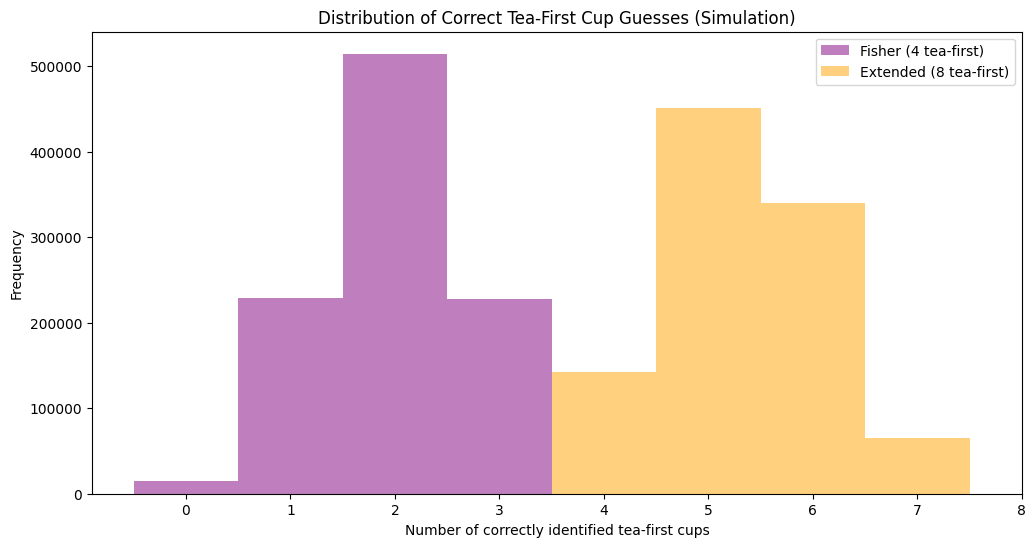

In [21]:
# Plot the tea first cups correctly identified.
bins_8_fisher = np.arange(0, 5) - 0.5     # Fisher (0–4 correct)
bins_12_extended = np.arange(0, 9) - 0.5   # Extended (0–8 correct)

plt.figure(figsize=(12,6))
plt.hist(counts_8_fisher, bins=bins_8_fisher, alpha=0.5, color='purple', label="Fisher (4 tea-first)")
plt.hist(counts_12_extended, bins=bins_12_extended, alpha=0.5, color='orange', label="Extended (8 tea-first)")

plt.xticks(range(0, 9))
plt.xlabel("Number of correctly identified tea-first cups")
plt.ylabel("Frequency")
plt.title("Distribution of Correct Tea-First Cup Guesses (Simulation)")
plt.legend()
plt.show()

### Conclusion

In Fisher’s original tea tasting experiment with 8 cups, the probability of a perfect guess purely by chance is **1/70 ≈ 1.43%**. In the extended experiment (12 cups), this probability becomes **1/495 ≈ 0.2%.**<br>

A **p-value** is a measure used in statistics to decide whether the results of an experiment are likely due to chance or reflect a real effect. The **5% threshold (often written as α=0.05)** represents the researcher’s tolerance for error — it means being willing to accept a 5% chance of wrongly concluding that an effect exists.<br>

By increasing the number of cups from 8 to 12, there are many more possible combinations, so it becomes much harder to guess them all correctly by chance.

In the 12-cup experiment, the p-value of 0.002 (0.2%) means there is only a 0.2% chance that someone could get all cups right just by guessing. Because this is much smaller than 5%, the result is **statistically significant**. It gives even **stronger evidence** that the person can really tell the difference, not just guessing.

You can find more information about the **null hypothesis** at this [link](https://en.wikipedia.org/wiki/Null_hypothesis).<br>
For an explanation of **Type I** and **Type II** errors, see this [article](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/).

## Problem 2: Normal Distribution

![normal_distribution](img/vecteezy_3d-render-of-futuristic-retro-landscape-neon-light-on_8812942.jpg)

>Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### What is Standard Normal Distribution

The standard normal distribution is a specific form of the normal distribution, where the **mean (μ) is zero** and the **standard deviation (σ) is one**. This distribution is symmetric and creates a bell-shaped curve that is centered around the mean. Any normal distribution can be transformed into a standard normal distribution through a process called standardization. This involves converting individual values into **z-scores**, which indicates how many standard deviations a particular value lies from the mean.

The formula for calculating a **z-score** is:

<img src="https://captmd-11.github.io/blog/assets/images/zscoreformula.png" alt="z-score" width="200"/>

**Where:**<br>

-	**x** = value from the orginal distribution
-   **μ** = mean of the original distribution
-   **σ** = standard deviation of the original distribution

For more information on the standard normal distribution and how it is calculated, see this [resource](https://www.scribbr.com/statistics/standard-normal-distribution/) and this [guide](https://www.datacamp.com/blog/standard-normal-distribution?dc_referrer=https%3A%2F%2Fwww.google.com%2F).

### What is Standard Deviation

Standard deviation is a statistical measure that describes how much a set of data points deviate or spread out from the mean(average). If the standard deviation is low or small, this indicates that the data points are closely clustered around the mean. In case that the standard deviation is high, or large, it indicates that the data points are more widely spread out across a large range of values.<br>

More information about the standard deviation can be found on [Wikipedia](https://en.wikipedia.org/wiki/Standard_deviation).

### How it is calculated

- **1. Find the mean:**<br>
     Calculate the average of all data points.

- **2. Calculate the variance:**<br>
    - Subtract the mean from each data point to find its deviation (the distance from the mean).
    - Square each deviation (to make all values positive).
    - Add up all the squared deviations.
    - Divide the result by *one less than th enumber of data points* (for a sample standard deviation). This value reppresents the variance, or the standard deviation squared.

- **3. Take the square root:**<br>
     Find the square root of the variance to obtain the standard deviation.

For a step-by-step example of the calculation, see this [YouTube video](https://www.youtube.com/shorts/iJRlGE2c2es).

Depending on the available data, either the **population standard deviation** or the **sample standard deviation** can be used.

### Population standard deviation (σ)

This formula is used when we include all values in the entire set in our calculation, in other words when we have data for the entire population and we can measure every member of the group.

<img src="https://discovery.cs.illinois.edu/guides/Statistics-with-Python/pop-std.png" alt="population" width="300"/>

**Where:**<br>

-	**σ** = population standard deviation
-   **$x_i$** = each data point
-   **μ** = population mean (average)
-   **N** = total number of data points

### Sample standard deviation (s)

This formula is used when the calculation is based on a subset (sample) of the entire population. The main difference lies in the denominator: instead of dividing by n, we divide by *n – 1*. This adjustment, known as **Bessel’s correction**, provides an unbiased estimate of the population standard deviation.

<img src= "https://discovery.cs.illinois.edu/guides/Statistics-with-Python/samp-std.png" alt="sample" width="300"/>

**Where:**<br>

-	**s** = sample standard deviation
-   **$x_i$** = each data point in the sample
-   **$\bar{x}$** = sample mean (average)
-   **n** = number of data points in the sample

More information about standard deviation can be found on this [link](https://www.jmp.com/en/statistics-knowledge-portal/measures-of-central-tendency-and-variability/standard-deviation).

### Problem solving

Firstly, I need to import relevant libraries.

In [1]:
# Numerical operation
import numpy as np

# Data visualization and plotting 
import matplotlib.pyplot as plt

In [2]:
# Generate 100,000 samples, each of size 10, from a standard normal distribution using "default_rng() function."

rng = np.random.default_rng()
samples = rng.standard_normal(size=(100000, 10))
print(samples.shape)

(100000, 10)


In [3]:
# Calculate the total mean and total standard devation of all samples.
total_mean = np.mean(samples)
total_sd = np.std(samples)

# Printing the total mean and standard deviation.
print("The mean of all samples is: ",total_mean)
print("The sandard deviation of all samles is : ", total_sd)

The mean of all samples is:  0.0005253537011326248
The sandard deviation of all samles is :  0.9997085971000366


In [4]:
# Compute the standard deviation for each of the 100,000 samples.
# https://numpy.org/doc/stable/reference/generated/numpy.std.html

# Sample Standard Deviation (ddof=1)
# NumPy's default for np.std() has ddof=0. We must specify ddof=1 explicitly.
sample_sd = np.std(samples, axis=1, ddof=1)

# Population Standard Deviation (ddof=0)
# NumPy's default for np.std() is ddof=0, so we can omit the parameter or set it explicitly.
population_sd = np.std(samples, axis=1, ddof=0)

print(f"Mean of 'Sample Standard Deviation (ddof=1)': {np.mean(sample_sd):.4f}")
print(f"Mean of 'Population Standard Deviation (ddof=0)': {np.mean(population_sd):.4f}")

Mean of 'Sample Standard Deviation (ddof=1)': 0.9728
Mean of 'Population Standard Deviation (ddof=0)': 0.9228


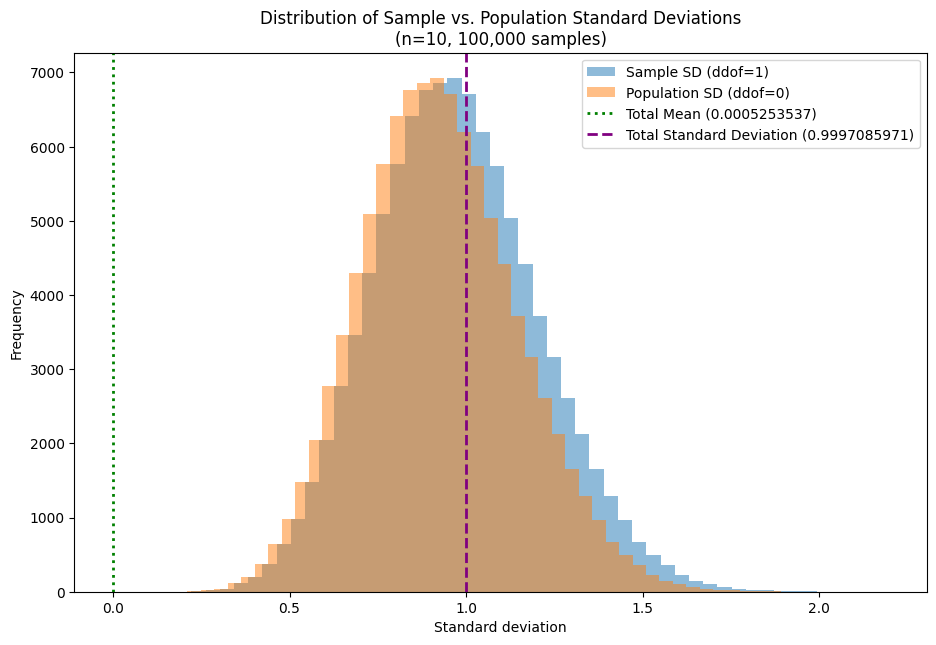

In [5]:
# Plot histograms
plt.figure(figsize=(11,7))
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)')
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)')

# Add vertical lines for total mean and total standard deviation
plt.axvline(total_mean, color="green", linestyle = ":", linewidth = 2, label = f"Total Mean ({total_mean:.10f})")
plt.axvline(total_sd, color="purple", linestyle = "--", linewidth = 2, label = f"Total Standard Deviation ({total_sd:.10f})" )
plt.xlabel('Standard deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Sample vs. Population Standard Deviations\n(n=10, 100,000 samples)')
plt.legend()
plt.show()

### Conclusion

The **sample_sd** (ddof=1) values are slightly larger on average than the **population_sd** (ddof=0), so their histogram is shifted slightly to the right and the curve is shifted slightly to the right. Both distributions are bell-shaped. This occurs because dividing by **(n-1)** instead of **n** corrects the bias in estimating the true population standard deviation from a small sample. 

AAs the sample size increases, each sample’s standard deviation becomes a more accurate reflection of the true population standard deviation (1.0). The sampling variability decreases, making the histogram narrower. The difference between **sample_sd** (ddof=1) and **population_sd** (ddof=0) becomes negligible, and the two results converge.

## Problem 3: t-Test

![t-test](img/t-test-r.png)

>A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d=0,0.1,0.2,…,1.0, repeat 
the following simulation 1,000 times:
>
>1.	Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
>2.	Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
>3.	Record the proportion of times the null hypothesis is not rejected.
>
>Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

### What is Type II error

It is a statistical error, also known as **false negative**, that occurs when a statistical test fails to reject a **false null hypothesis**. This 
means we mistakenly believe that a relationship or difference does not exist when it actually does. The probability of a Type II error is represented 
by **β (beta)**.

More information on Type II errors, including examples, can be found on [Investopedia](https://www.investopedia.com/terms/t/type-ii-error.asp).

### What is a Null Hypothesis (H₀)

The **null hypothesis (H₀)** is a statistical statement that assumes there is no significant relationship, difference, or effect in the data being 
analysed, and that any observed variations or trends are simply result of random fluctuation rather than a true underlying cause. It serves as the 
default position that researchers test against, if any observed difference in a sample occurs by chance. Researchers either find sufficient evidence 
to reject the null hypothesis in favor of the alternative hypothesis or fail to reject it.

Further explanation of the null hypothesis and its role in statistical testing can be found on [Investopedia](https://www.investopedia.com/terms/n/null_hypothesis.asp).

### What is a Alternative Hypothesis (Hₐ)

The **alternative hypothesis (Hₐ)** is a claim that contrasts with the null hypothesis. While the null hypothesis assumes no effect, difference, or 
relationship, the alternative hypothesis states that an effect, difference, or relationship does exist. Researchers test the null hypothesis and 
either find sufficient evidence to reject it in favor of the alternative hypothesis or fail to reject it. The null and alternative hypotheses are 
exhaustive, meaning they together account for all possible outcomes, and mutually exclusive, meaning only one of them can be true at a time.

A detailed explanation of null and alternative hypotheses, including definitions and examples, is provided by [Scribbr](https://www.scribbr.com/statistics/null-and-alternative-hypotheses/).

### What is a t-Test

A **t-test** is a statistical method used to compare means using hypothesis testing. 

**It can be used to:**
- Compare one sample mean to a known value *(one-sample t-test)*
- Compare the means of two independent groups *(independent two-sample t-test)*
- Compare paired measurements *(paired t-test)*

The t-test uses the difference between group means, the variability within groups, and the sample size.

**The general steps for conducting a t-test are:**
1.  State hypotheses:<br>
    **- H₀:**  No difference (e.g., mean difference = 0)<br>
    **- Hₐ**:  A real difference exists (e.g., mean difference ≠ 0)<br>

2.	Choose a **significance level (α)**: Typicaly choise is 0.05
3.	Check the data for errors and test assumptions
4.	Perform the test and interpret the result using the t-distribution

An overview of the t-test, including its purpose, assumptions, and applications, is available on [Investopedia](https://www.investopedia.com/terms/t/t-test.asp).

### Problem solving

First, I need to import the relevant libraries and set up the parameters for this problem.<br>
I will generate two groups, each containing **100 random samples**, and set the **significance level to 0.05**.

In [ ]:
# Numerical operation
import numpy as np

# Data visualization and plotting 
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Statistical functions.
from scipy.stats import ttest_ind

In [5]:
# Setting up parameters

# Sample size per each group
sample_size = 100

# Number of simulations
simulations = 1000 

# Choosing significance level
alpha = 0.05

In [6]:
# Mean difference values were generated as d = (0.0, 0.1, 0.2, …, 1.0).
# The NumPy function "numpy.arange()" was used to generate this sequence of d values.
# Reference: https://www.datacamp.com/doc/numpy/arange

mean_d = np.arange(0, 1.1, 0.1)
print(mean_d)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


The first group of samples has a **mean of 0** and a **standard deviation of 1**.<br>
The second group has a **mean of d**, where **d** takes values **0, 0.1, 0.2, …, 1.0**, and a **standard deviation of 1**. <br>
Then, I perform a t-test on both groups, record the proportion of times the null hypothesis is not rejected, and plot the results.

In [ ]:
# Simulation to estimate Type II error rates

# This will store the Type II error rate for each value of d
error_type2 = []

# Loop over each mean difference d
for d in mean_d:
    non_rejection_count = 0  # Reset counter for each d

    # Repeat the simulation 1000 times
    for _ in range(simulations):
        # Generate random samples from normal distributions
        group_1 = np.random.normal(0, 1, sample_size)  # Group_1: mean=0, std=1
        group_2 = np.random.normal(d, 1, sample_size)  # Group_2: mean=d, std=1

        # Perform independent t-test
        t_stats, p_values = ttest_ind(group_1, group_2)

        # Check if we fail to reject the null hypothesis
        if p_values >= alpha:
            non_rejection_count += 1  # Increment counter if null hypothesis is not rejected

    # Calculate Type II error rate for this value of d
    rates_type2 = non_rejection_count / simulations
    error_type2.append(rates_type2)  # Store the results

The table below summarizes the simulation results by showing the **mean difference (d)**, the calculated **Type II error rate (β)**, and the associated 
**statistical power (1 − β)** for each value of d.

In [10]:
# Calculate statistial power
power = 1 - np.array(error_type2)

# Create a results table
result = pd.DataFrame({
    "Mean Difference (d)": mean_d,
    "Type II Error Rate (β)": error_type2,
    "Statistical Power (1-β)": power
})
print(result)

    Mean Difference (d)  Type II Error Rate (β)  Statistical Power (1-β)
0                   0.0                   0.937                    0.063
1                   0.1                   0.872                    0.128
2                   0.2                   0.718                    0.282
3                   0.3                   0.422                    0.578
4                   0.4                   0.173                    0.827
5                   0.5                   0.054                    0.946
6                   0.6                   0.010                    0.990
7                   0.7                   0.000                    1.000
8                   0.8                   0.000                    1.000
9                   0.9                   0.000                    1.000
10                  1.0                   0.000                    1.000


When the mean difference d = 0, the null hypothesis is true, and failing to reject H₀ is the correct decision.<br>
The statistical power (1 − β) is very low because there is no true effect to detect.

As d increases, the true difference between the groups becomes larger.<br>
Consequently, the Type II error rate (β) decreases, and the statistical power (1 − β) increases.<br>
This indicates that the t-test is increasingly likely to detect a true difference between the groups as the effect size grows.

A detailed explanation of statstical power can be found on [Investopedia](https://www.investopedia.com/terms/s/statistical-power.asp) or [Scribbr](https://www.scribbr.com/statistics/statistical-power/).

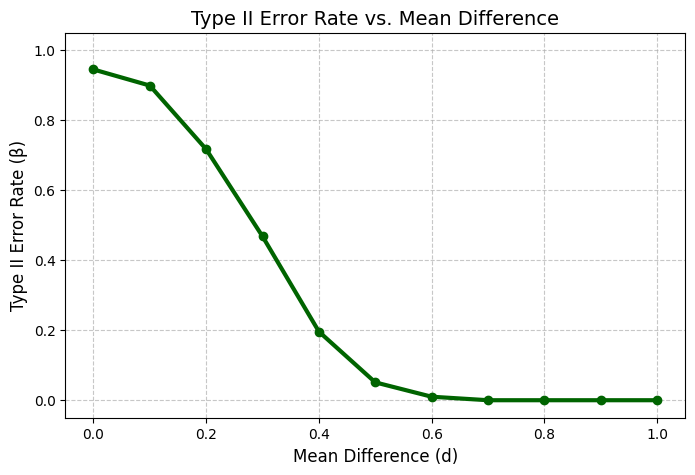

In [ ]:
# The plot below visualizes the relationship between the mean difference (d) and the Type II error rate (β).
plt.figure(figsize=(8,5))
plt.plot(mean_d, error_type2, marker='o', linestyle='-', color='darkgreen', linewidth = 3)

# Add labels and title
plt.xlabel('Mean Difference (d)', fontsize=12)
plt.ylabel('Type II Error Rate (β)', fontsize=12)
plt.title('Type II Error Rate vs. Mean Difference', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits slightly below zero
plt.xlim(-0.05, mean_d[-1] + 0.05)  # X-axis starts a bit below 0 and slightly above max d
plt.ylim(-0.05, 1.05)               # Y-axis starts a bit below 0

# Show the plot
plt.show()

### Conclusion

As shown by the results, the **Type II error rate decreases as the mean difference (d) increases**. For small mean differences (in the range 0.0–0.2), 
the Type II error rate is high (close to 1), indicating that the t-test often fails to detect a true difference between groups. When effect sizes are 
small, the t-test may therefore frequently fail to reject the null hypothesis, resulting in high Type II error rates. To reliably detect small 
effects, a larger sample size or a more powerful test should be considered.

## Problem 4: ANOVA

![ANOVA](img/ANOVA.jpg)

>Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.
>
>1. Perform a one-way ANOVA to test whether all three means are equal.
>2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
>3. Compare the conclusions.
>
>Write a short note on why ANOVA is preferred over running several t-tests.

### What is ANOVA (Analysis of Variance)?

ANOVA is a statistical test used to compare the means of more than two groups to determine whether the differences are statistically significant or 
likely due to random variation. It analyses the variance within groups and between groups to assess whether the observed differences in group means 
are greater than what would be expected within the groups.

ANOVA Formula

![ANOVA formula](img/ANOVA%20formula.jpg)

**Where:**<br>
F = ANOVA coefficient<br>
MST = Mean sum of squares due to treatment (between group variance)<br>
MSE = Mean sum of squares due to error (within group variance)

#### One-Way ANOVA

It is used when there is one independent variable with two or more groups, and it determines whether there is a significant difference between the 
means of these groups.
- Null Hypothesis **(H₀)**: The mean scores of the groups from which the samples were taken are equal.
- Alternative Hypothesis **(Hₐ)**: At least one group mean is significantly different.

### Problem Solving

Firstly, I need to import relevant libraries.

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

In the next step, I generate three samples from a normal distribution with means of 0, 0.5, and 1. Each sample has a standard deviation of 1 and a sample size of 30.

In [4]:
# Sample group 1: mean=0, standard deviation = 1, sample size = 30
group_1 = np.random.normal(loc=0.0, scale=1.0, size=30)

# Sample group 2: mean=0.5, standard deviation = 1, sample size = 30
group_2 = np.random.normal(loc=0.5, scale=1.0, size=30)

# Sample group 3: mean=1, standard deviation = 1, sample size = 30
group_3 = np.random.normal(loc=1.0, scale=1.0, size=30)

### End